<a href="https://colab.research.google.com/github/hiyuchang/MATH5470-SML/blob/main/MATH5470_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q3

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
x = np.linspace(-2, 2, 50)

In [ ]:
# interval1 = [1 if (i<1) else 0 for i in x]
interval2 = [1 if (i>=1) else 0 for i in x]

In [ ]:
y = np.ones(50) + x - 2 * np.power(x-np.ones(50), 2) * interval2

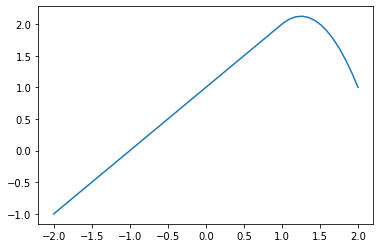

In [ ]:
plt.plot(x,y)
plt.show()

# Q6(a) Poly

# Cross-validation

In [ ]:
import pandas as pd
data = pd.read_csv('Wage.csv', usecols=['age', 'wage'])
print(data.shape)
print(data.head())

(3000, 2)
   age        wage
0   18   75.043154
1   24   70.476020
2   45  130.982177
3   43  154.685293
4   50   75.043154


In [ ]:
x = data['age'].to_numpy().reshape(-1,1)
y = data['wage'].to_numpy().reshape(-1,1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
def create_polynomial_regression_model(degree):
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x.reshape(-1,1))
    poly = LinearRegression()
    return np.mean(cross_val_score(poly, x_poly, y.reshape(-1,1), cv=5))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

4


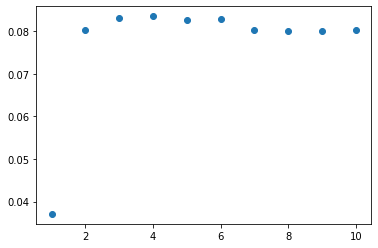

In [ ]:
poly_cv = []
for d in range(1,11):
    poly_cv.append(create_polynomial_regression_model(d))
plt.scatter(range(1,11),poly_cv)

max_value = max(poly_cv)
for idx in range(len(poly_cv)):
    if poly_cv[idx] == max_value:
      optimal_d = idx + 1
print(optimal_d)

## ANOVA

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
models = []
for d in range(1,11):
    polynomial_features= PolynomialFeatures(degree=d)
    x_poly = polynomial_features.fit_transform(x)
    model = sm.GLS(y, x_poly).fit()
    # model = ols('wage ~ C(age)', data).fit()
    models.append(model)

table = sm.stats.anova_lm(models[0], models[1], models[2], models[3], models[4], models[5], models[6], models[7])
print(table)

   df_resid           ssr  df_diff        ss_diff           F        Pr(>F)
0    2998.0  5.022216e+06      0.0            NaN         NaN           NaN
1    2997.0  4.793430e+06      1.0  228786.010128  143.731510  2.211791e-32
2    2996.0  4.777674e+06      1.0   15755.693664    9.898287  1.670556e-03
3    2995.0  4.771604e+06      1.0    6070.152124    3.813485  5.093457e-02
4    2994.0  4.770322e+06      1.0    1282.563017    0.805752  3.694514e-01
5    2993.0  4.766389e+06      1.0    3932.257650    2.470384  1.161153e-01
6    2993.0  4.764599e+06     -0.0    1790.496520        -inf           NaN
7    2993.0  4.764136e+06     -0.0     462.457170        -inf           NaN


## Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 333.25527471319606)

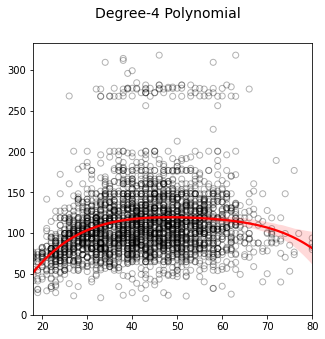

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
fig.suptitle('Degree-4 Polynomial', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(x, y, facecolor='None', edgecolor='k', alpha=0.3)
import seaborn as sns
sns.regplot(x, y, order = 4, truncate=True, scatter=False, ax=ax1, color='r')
ax1.set_ylim(ymin=0)

# Q6(b) Step function

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [ ]:
def create_step_function(cut_num):
    df_cut, bins = pd.cut(data['age'], cut_num, retbins=True, right=True)
    df_cut.value_counts(sort=False)
    df_steps = pd.concat([data['age'], df_cut, data['wage']], keys=['age','age_cuts','wage'], axis=1)
    df_steps.head()

    # Create dummy variables for the age groups
    df_steps_dummies = pd.get_dummies(df_steps['age_cuts'])
    # Statsmodels requires explicit adding of a constant (intercept)
    df_steps_dummies = sm.add_constant(df_steps_dummies)
    df_steps_dummies.head()

    x_step = df_steps_dummies.drop(df_steps_dummies.columns[1], axis=1).to_numpy()
    y = df_steps.wage.to_numpy()
    # model = sm.GLM(y, x_step).fit()
    model = LinearRegression()
    return np.mean(cross_val_score(model, x_step, y.reshape(-1,1), cv=5))

8


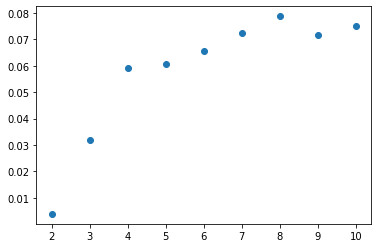

In [ ]:
step_cv = []
for i in range(2,11):
    score = create_step_function(cut_num=i)
    step_cv.append(score)

plt.scatter(range(2,11),step_cv)

max_value = max(step_cv)
for idx in range(len(step_cv)):
    if step_cv[idx] == max_value:
      optimal_cut = idx + 2  # as it starts from 2
print(optimal_cut)

## Plot

In [ ]:
# optimal model
df_cut, bins = pd.cut(data['age'], optimal_cut, retbins=True, right=True)
df_cut.value_counts(sort=False)
df_steps = pd.concat([data['age'], df_cut, data['wage']], keys=['age','age_cuts','wage'], axis=1)
df_steps.head()

# Create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_steps['age_cuts'])
# Statsmodels requires explicit adding of a constant (intercept)
df_steps_dummies = sm.add_constant(df_steps_dummies)
df_steps_dummies.head()

x_step = df_steps_dummies.drop(df_steps_dummies.columns[1], axis=1).to_numpy()
y = df_steps.wage.to_numpy()
model = LinearRegression().fit(x_step, y)
# y_pred = model.predict(x_step)

In [ ]:
# create X_test and y_pred
x_special = np.arange(min(x), max(x)).reshape(-1,1)
bin_mapping = np.digitize(x_special.ravel(), bins)
# bin_mapping

X_test = sm.add_constant(pd.get_dummies(bin_mapping).drop(1, axis=1))
X_test.head()

y_pred = model.predict(X_test)

Text(0, 0.5, 'wage')

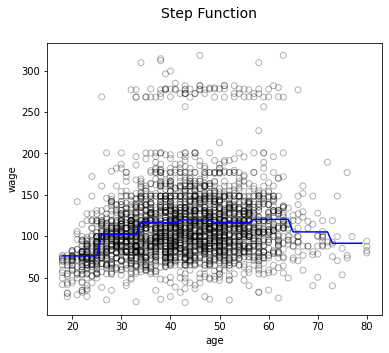

In [ ]:
# creating plots
fig, ax1 = plt.subplots(1,1, figsize=(6,5))
fig.suptitle('Step Function', fontsize=14)
ax1.scatter(data['age'], data['wage'], facecolor='None', edgecolor='k', alpha=0.3)

ax1.plot(x_special, y_pred, c='b')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
# ax1.set_ylim(ymin=0)

# Q7

I am not very sure of this part, so I change to Q8 instead. See another colab file.

In [ ]:
import pandas as pd
df = pd.read_csv('Wage.csv')
# print(df.shape)
print(df.columns.values)

['Unnamed: 0' 'year' 'age' 'sex' 'maritl' 'race' 'education' 'region'
 'jobclass' 'health' 'health_ins' 'logwage' 'wage']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


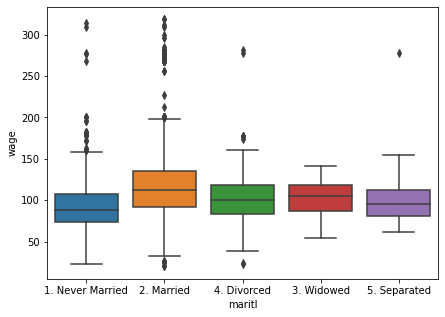

In [ ]:
import seaborn as sns
fig1, ax1 = plt.subplots(1,1, figsize=(7,5))
sns.boxplot('maritl', 'wage', data=df, orient='v', ax=ax1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


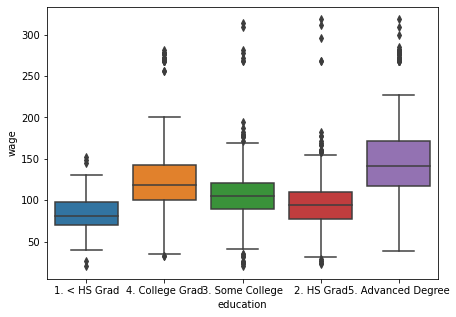

In [ ]:
fig2, ax2 = plt.subplots(1,1, figsize=(7,5))
sns.boxplot('education', 'wage', data=df, orient='v', ax=ax2)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_wage = pd.read_csv('Wage.csv')

In [ ]:
plt.style.use('classic')

In [ ]:
df_edu = df_wage.pivot(columns = 'education',values= 'wage')

In [ ]:
#importing statsmodel library to fit lowess curve through data
import statsmodels.api as sm

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(14,6))

df_wage.plot.scatter('age','wage',ax=ax[0])
lowess = sm.nonparametric.lowess(df_wage['wage'], df_wage['age'], frac=.2)
ax[0].plot(lowess[:, 0], lowess[:, 1])

df_wage.plot.scatter('year', 'wage', ax=ax[1])
year_median = df_wage.groupby('year')['wage'].median()
ax[1].plot(year_median)


boxplot = df_edu.plot.box(ax=ax[2], rot=45, patch_artist=True)
colors = ['lightblue', 'green', 'yellow', 'blue', 'red']
for artist, color in zip(boxplot.artists, colors):
    artist.set_facecolor(color)

In [ ]:
df1 = df_wage[['age', 'year', 'education', 'wage']]
df_melt = pd.melt(df1, id_vars=['education', 'wage'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


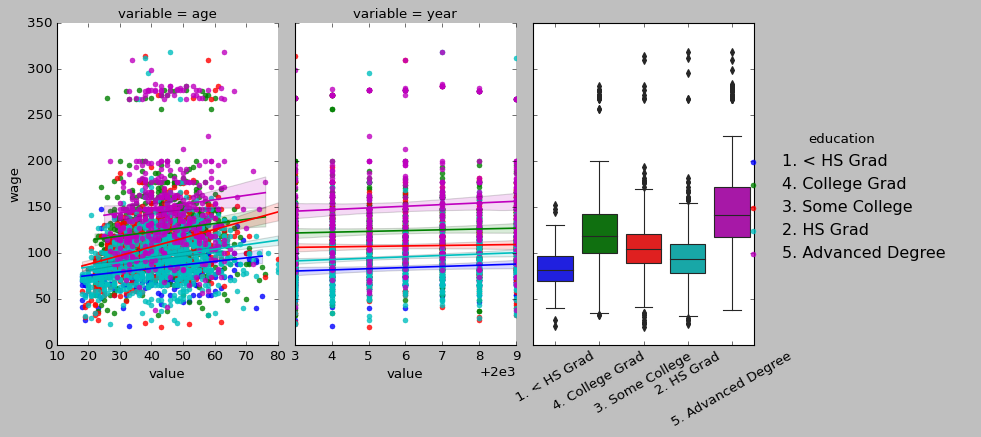

In [ ]:
seaborn_grid = sns.lmplot('value', 'wage', col='variable', hue='education', data=df_melt, sharex=False)
seaborn_grid.fig.set_figwidth(8)

left, bottom, width, height = seaborn_grid.fig.axes[0]._position.bounds
left2, bottom2, width2, height2 = seaborn_grid.fig.axes[1]._position.bounds
left_diff = left2 - left
seaborn_grid.fig.add_axes((left2 + left_diff, bottom, width, height))

sns.boxplot('education', 'wage', data=df_wage, ax = seaborn_grid.fig.axes[2])
ax2 = seaborn_grid.fig.axes[2]
ax2.set_yticklabels([])
ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)
ax2.set_ylabel('')
ax2.set_xlabel('');

leg = seaborn_grid.fig.legends[0]
leg.set_bbox_to_anchor([0, .1, 1.5,1])

In [ ]:
df2 = df_wage[['age', 'year', 'maritl', 'wage']]
df_melt_2 = pd.melt(df2, id_vars=['maritl', 'wage'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


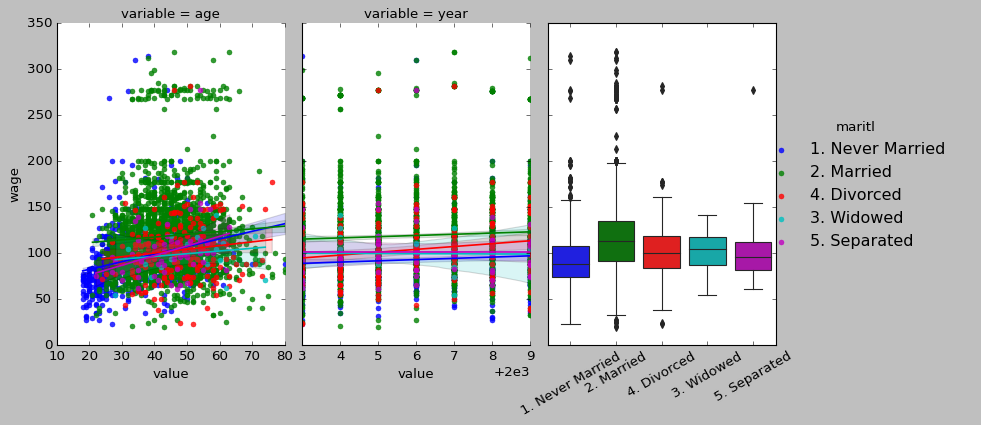

In [ ]:
seaborn_grid = sns.lmplot('value', 'wage', col='variable', hue='maritl', data=df_melt_2, sharex=False)
seaborn_grid.fig.set_figwidth(8)

left, bottom, width, height = seaborn_grid.fig.axes[0]._position.bounds
left2, bottom2, width2, height2 = seaborn_grid.fig.axes[1]._position.bounds
left_diff = left2 - left
seaborn_grid.fig.add_axes((left2 + left_diff, bottom, width, height))

sns.boxplot('maritl', 'wage', data=df_wage, ax = seaborn_grid.fig.axes[2])
ax2 = seaborn_grid.fig.axes[2]
ax2.set_yticklabels([])
ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)
ax2.set_ylabel('')
ax2.set_xlabel('');

leg = seaborn_grid.fig.legends[0]
leg.set_bbox_to_anchor([0, .1, 1.5,1])